In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Flatten,BatchNormalization,Dropout,Conv2D,MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras import utils

2024-06-21 13:10:32.687848: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 13:10:32.688069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 13:10:32.859785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
class feature_extraction():
    def __init__(self,filters,kernel_size,strides,padding,activation,pool_size):
        self.conv_1=Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding,activation=activation)
        self.batch_1=BatchNormalization()
        self.batch_2=BatchNormalization()
        self.batch_3=BatchNormalization()
        self.batch_4=BatchNormalization()
        self.max_pool=MaxPool2D(pool_size=pool_size)
        self.conv_2=Conv2D(filters=filters*2,kernel_size=kernel_size,strides=strides,padding=padding,activation=activation)
        self.conv_3=Conv2D(filters=filters*4,kernel_size=kernel_size,strides=strides,padding=padding,activation=activation)
    def __call__(self,inputs):
        x=self.conv_1(inputs)
        x=self.batch_1(x)
        x=self.max_pool(x)
        
        x=self.conv_2(x)
        x=self.batch_2(x)
        
        x=self.conv_3(x)
        x=self.batch_4(x)
        x=self.max_pool(x)
        
        return Model(inputs=inputs,outputs=x)

In [3]:
class lenet_model(feature_extraction):
    def __init__(self,filters,kernel_size,strides,padding,activation,pool_size):
        self.flatten=Flatten()
        self.dense_1=Dense(512,activation='relu')
        self.batch_5=BatchNormalization()
        self.dense_2=Dense(1,activation='sigmoid')
        self.feature_extractor=feature_extraction(filters,kernel_size,strides,padding,activation,pool_size)
    def __call__(self,inputs):
        f_model=self.feature_extractor(inputs)
        x=f_model(inputs)
        x=self.flatten(x)
        x=self.dense_1(x)
        x=self.batch_5(x)
        x=self.dense_2(x)
        return Model(inputs=inputs,outputs=x)

In [4]:
i=Input(shape=(200,200,3),name='Input_layer')
lm_object=lenet_model(32,(3,3),2,'same','relu',(2,2))
model=lm_object(i)

In [5]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_1 (Functional)       │ (None, 6, 6, 128)      │        94,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,456,513 (9.37 MB)

 Trainable params: 2,455,041 (9.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

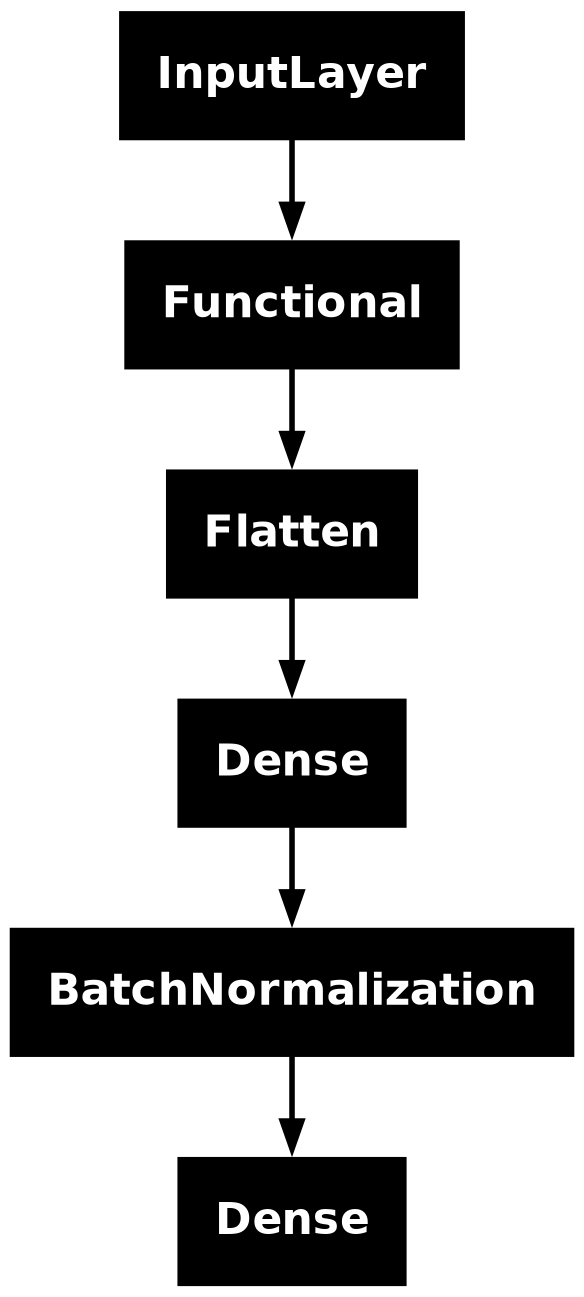

In [6]:
utils.plot_model(model)

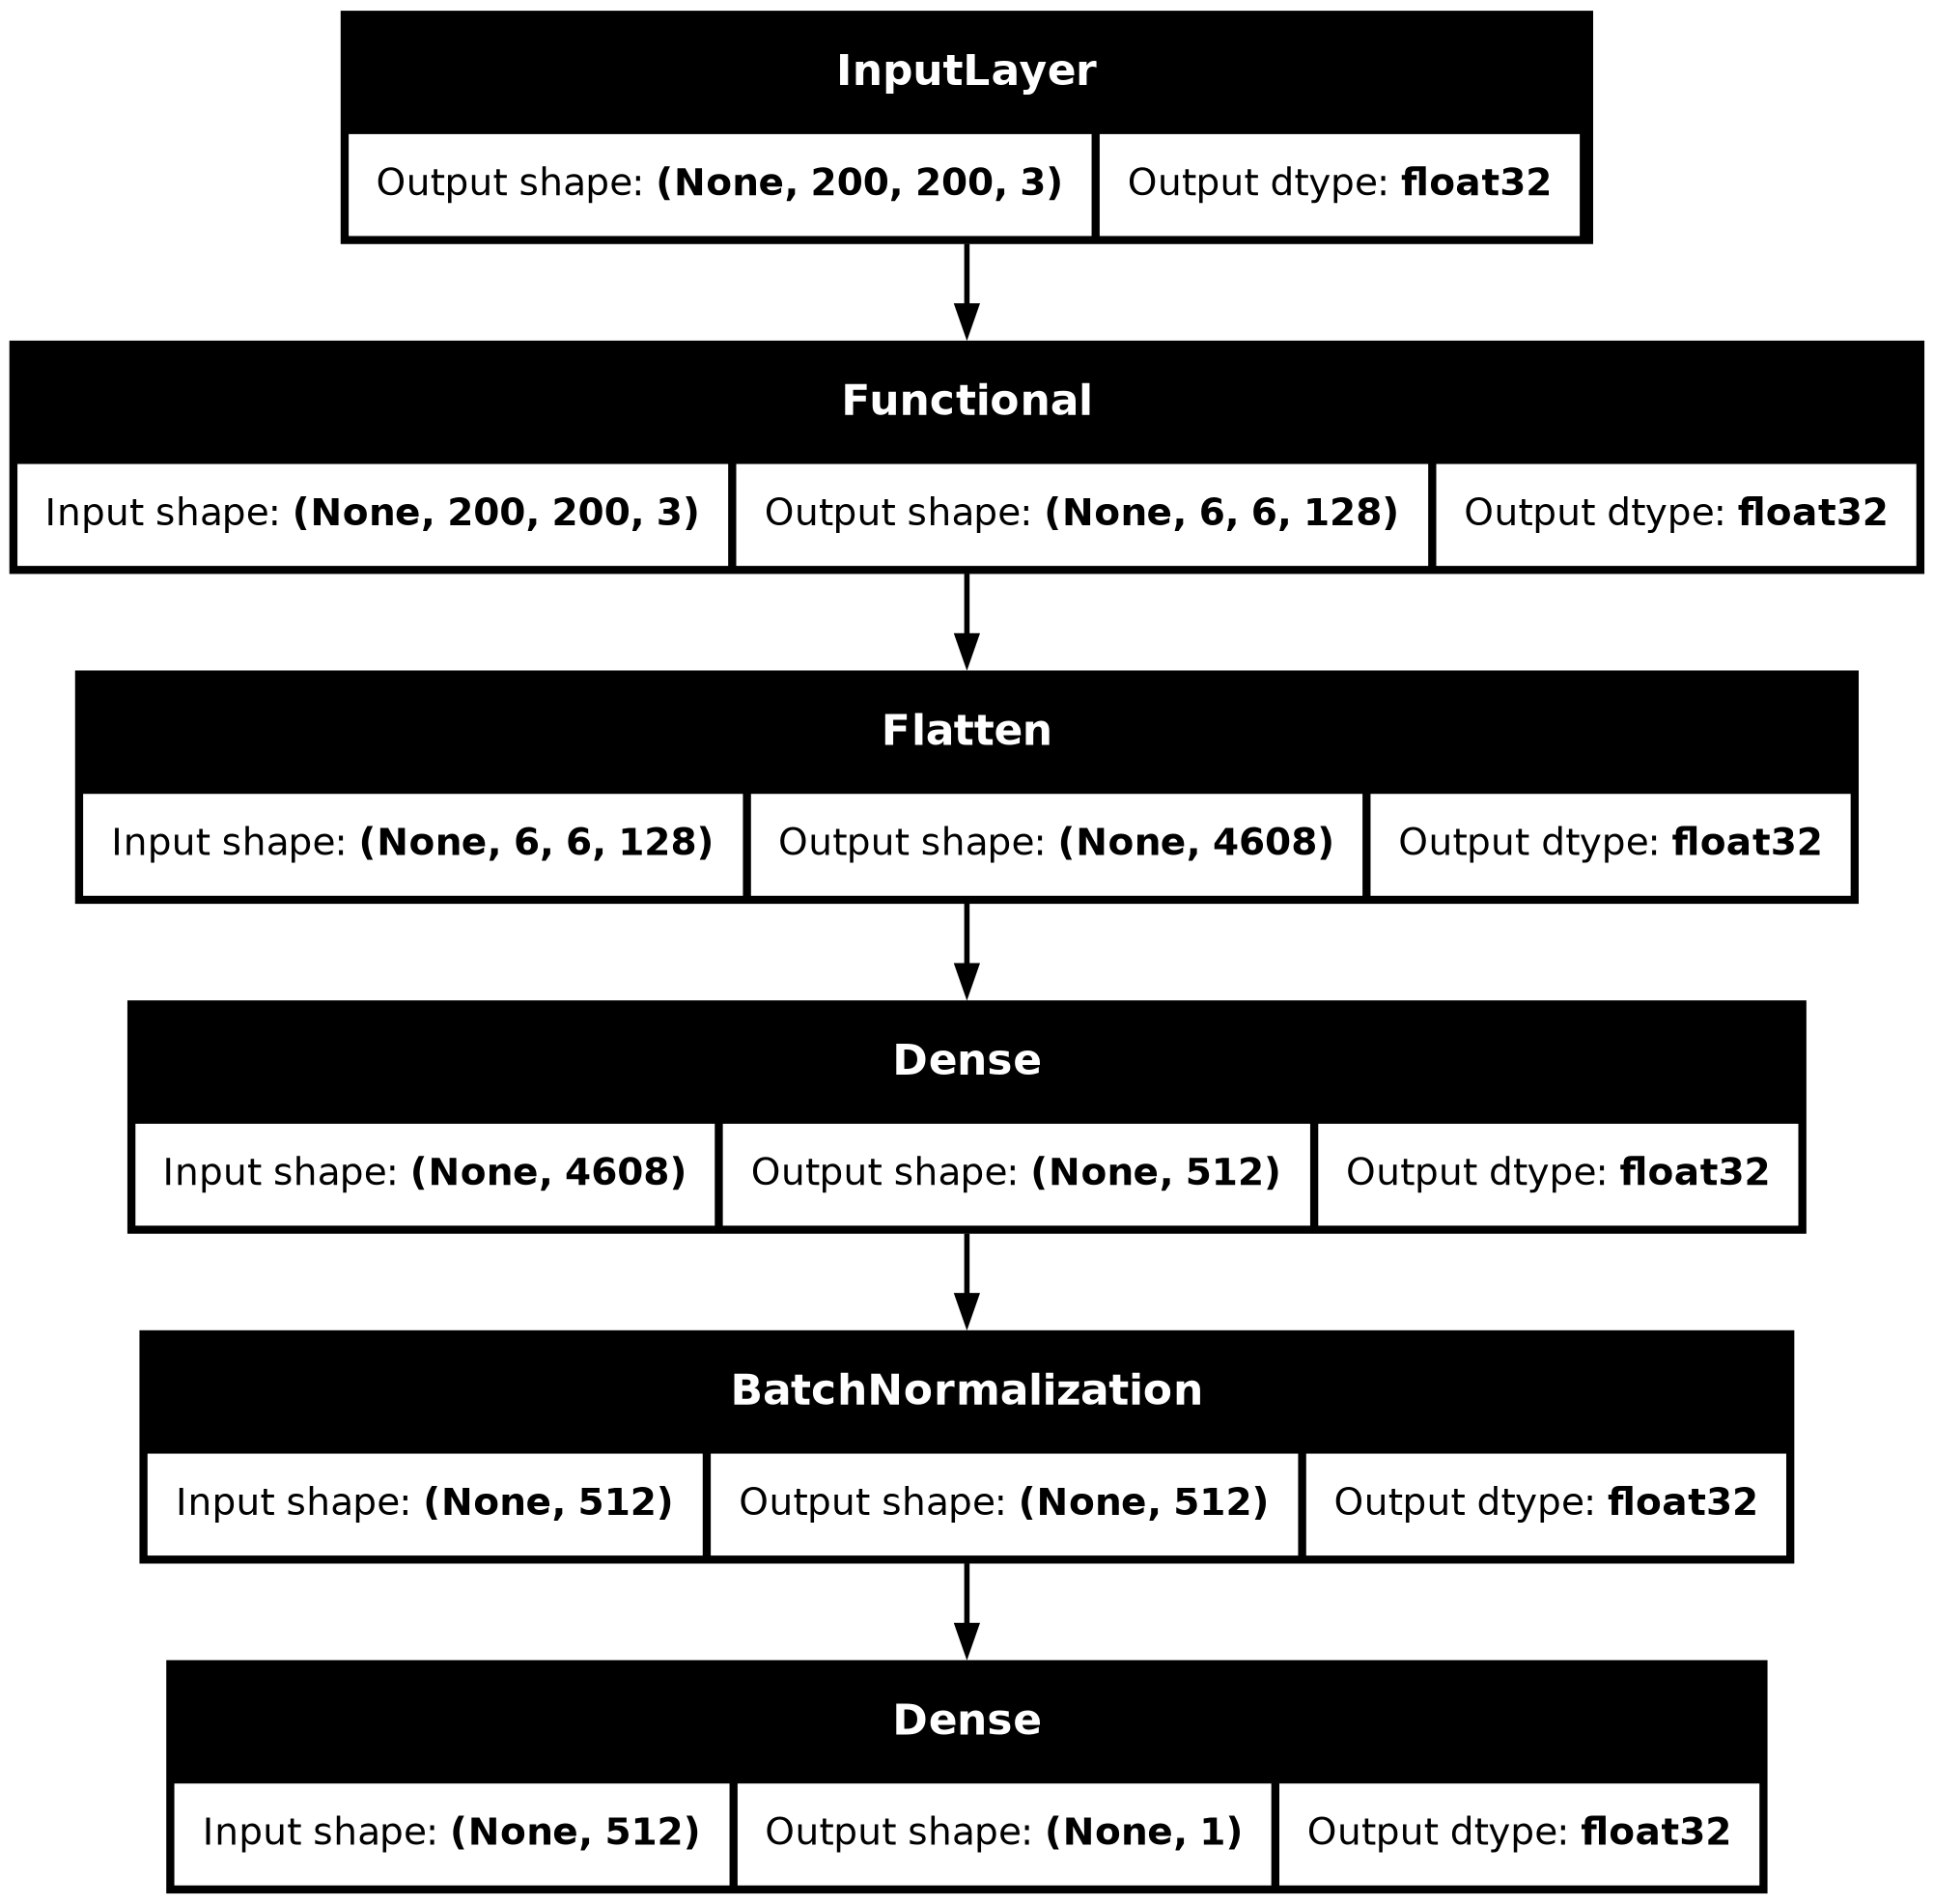

In [7]:
utils.plot_model(model,show_shapes=True,show_dtype=True)